In [48]:
import numpy as np
from utilities.cwt import *

from matplotlib import pyplot as plt


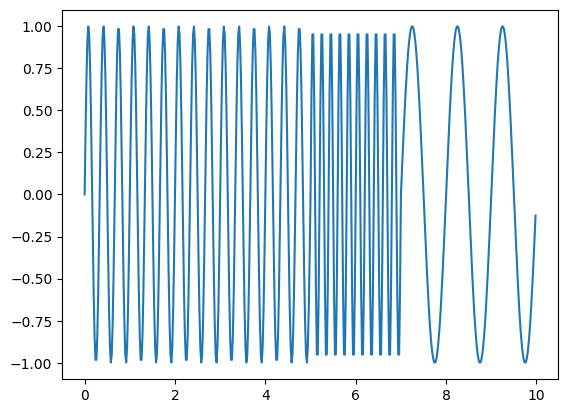

In [7]:
# Define parameters
duration = 10  # Duration of the signal in seconds
sampling_rate = 50  # Sampling rate in Hz

# Generate time vector
t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)

# Generate signal with varying frequencies
o_signal = np.sin(2 * np.pi * 3 * t) * (t <= 5) + np.sin(2 * np.pi * 5 * t) * ((t > 5) & (t<=7)) + np.sin(2 * np.pi * 1 * t) * (t > 7)

plt.plot(t, o_signal)


dt = 0.02
33.0
[0.03553063 0.04225328 0.0502479  0.05975516 0.07106127 0.08450656
 0.10049581 0.11951033 0.14212253 0.16901313 0.20099161 0.23902066
 0.28424507 0.33802626 0.40198323 0.47804131 0.56849013 0.67605251
 0.80396646 0.95608263 1.13698027 1.35210502 1.60793291 1.91216526
 2.27396053 2.70421004 3.21586582 3.82433052 4.54792106 5.40842009
 6.43173165 7.64866104 9.09584213]
0.03553063331560067
signal shape is torch.Size([1, 500])
scales shape is torch.Size([33])
torch.Size([1, 500])
wavelet shape is torch.Size([500, 33])
fft shape is torch.Size([1, 500])
torch.Size([33, 500])


/var/folders/38/7n1_2vzs5yj4rjtfy6_m6d_00000gn/T/ipykernel_25822/764245960.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


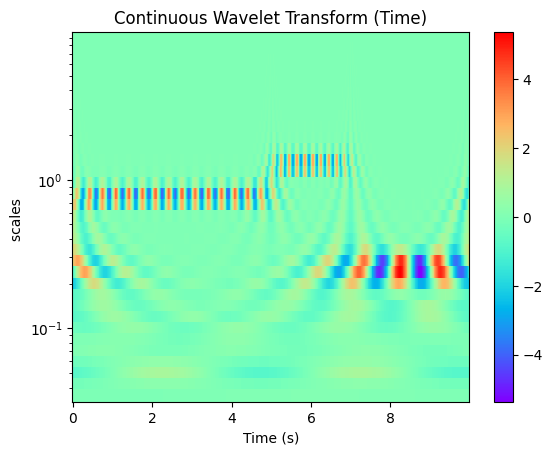

In [51]:

minFrq = 0.2
maxFrq = 24
minSpaceFrq = 0.002
maxSpaceFrq = 0.12
dt = 1/sampling_rate
dj = 0.25
print(f'dt = {dt}')
nf = 30
# logspace from paper implemenation 
ftime = np.logspace(np.log10(minFrq), np.log10(maxFrq), nf)
fspace = np.logspace(np.log10(minSpaceFrq), np.log10(maxSpaceFrq), nf)

wf = "morlet"
w0 = 8

s0 = (2*dt* (w0 + np.sqrt(2 + w0))) / (4 *np.pi)
J = np.ceil((1/dj )* np.log2((duration * sampling_rate * dt) / s0))
print(J)
scales = s0 * 2**(np.arange(J) *dj)
print(scales)

print(s0)

signal = o_signal[np.newaxis, : ]

transform = cwt_time_vec(signal, scales,w0, dt)

transform = np.squeeze(transform)

real_transform_values = transform.real

print(real_transform_values.shape)

fig, axs = plt.subplots()
pcm = axs.pcolormesh(t, scales[::-1], real_transform_values, shading="nearest", cmap="rainbow")
axs.set_yscale("log")
axs.set_xlabel("Time (s)")
axs.set_ylabel("scales ")
axs.set_title("Continuous Wavelet Transform (Time)")
fig.colorbar(pcm, ax=axs)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


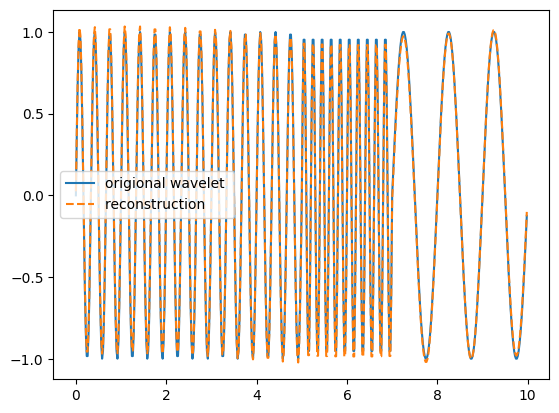

In [47]:



inverse_w_factor = inverse_cwt(transform, scales, dj, dt,w0)

#plt.plot(t, inverse)
plt.plot(t, o_signal, label="origional wavelet ")
plt.plot(t, inverse_w_factor, label="reconstruction ", ls ="--")
plt.legend()
